# <center> Forecasting bankruptcies in The Netherlands

![title](bankrupt.jpg)

<center>**Date:**  *January 28, 2019*
   
<center>**Course:**  *Applied Economic Analysis 1* 




|     **Names**    | **ANR's** |**SNR's** |
| ---------------- |:---------:|---------:|
|Immo van der Veen |   662556  | 1252919  |
| Philine Visser   |   148166  | 1256930  |


## Table of Contents

[**Introduction**](#Intro)

[**Methodology**](#Method)

[**Python Packages**](#pp)


[**Data Importing and Creating Time Series**](#DI)

[**Testing for Stationarity**](#Stat)

[**Making the Series Stationary by Moving Average**](#MA)

[**Making the Series Stationary by First Differencing**](#FD)

[**Making an ARIMA Model**](#ARIMA)

[**Forecasting the Timeseries**](#Forecast)

[**Concluding remarks**](#Concluding)


<a name="Intro"></a>
## Introduction

<div style="text-align: justify"> Many firms are subject to extreme events like acquisitions and bankruptcies as outcomes of corporate restructuring processes. These events can have major impacts on shareholders, employees, suppliers and other stakeholders. Bankruptcies are generally held to be cyclical and associated with economic performance. In 2018, 3144 companies and institutions (excluding sole proprietorships) have gone bankrupt in the Netherlands. According to the CBS, this is the lowest amount of bankruptcies in the 21st century. In 2013, there was a peak in the total number of filings, but afterwards a declining trend is being observed.
<br>
<br>
The literature provides evidence of determinants of firm failures from both a macroeconomic and firm speficic perspective. For instance, Bhattacharjee et al. (2009) investigated the impact of macroeconomic performance on firm failure and acquisition, using data of UK quoted firms. They found that bankruptcies are counter-cyclical to macroeconomic instability. In addition, other studies of Hudson (1986) and Robson (1996) provide empirical evidence supporting that movements in aggregrate failure rate coincide with changes in macroeconomic performance. Moreover, Liu (2004) modelled the short and long-term behaviour of corporate failure rates and found that specifically interest rates turn out to be an important factor influencing failure rates. 
<br>
<br>
From an individual firm's perspective, Shumway (2001) developed a hazard model in which he assess firm’s bankruptcy risks. While estimating a set of bankruptcies over 31 years. He found that a firm’s market-size, past stock returns and the idiosyncratic standard deviation of stock returns are significant determinants for forecasting bankruptcy.
<br>
<br>
However, we do not pursue to replicate a study to identify determinants of corporate failure rates. Instead, we are particularly interested in modelling the number of bankruptcy filling with its past values. In this study, we are going to conduct a forecast of bankruptcy filings in The Netherlands using an autoregressive (AR) model. We use data retrieved from the CBS with observations from 1981 until 2018. Our research question is: 
<br>
<br>
<center>**_‘What is the forecast of next month's total bankruptcies in The Netherlands for 2019?’_**  </div>


<a name="Method"></a>
## Methodology 

__Data description__
<div style="text-align: justify"> In order to conduct our forecast, we retrieved historical data from the CBS. The dataset contains the total number of declared bankruptcies per month in The Netherlands from January, 1981 until December, 2018. The total number per month consists of three categories: ‘Natuurlijke personen zonder eenmanszaak’, ‘Natuurlijke personen met eenmanszaak’ and ‘Bedrijven en Instellingen’. 
<br>
<br>
In [**Figure 1**](#Figure1), we plotted the bankruptcies according to these categories together with the total number. As we can see from the graph, all categories seem to co-move with each other. Therefore, in our analysis, we will not make a distinction regarding these categories and simply forecast the total number of bankruptcies in The Netherlands. </div>




#### __Approach__
<div style="text-align: justify"> If you want to predict the future of a time series, the immediate past is a good way to start. However, analyzing and forecasting time series data poses some challenges that carefully need to be considered in order to find reliable estimators. In time series data, the value of a variable typically tends to be correlated with its value in the next period, which is called serial correlation or autocorrelation.  </div>

We run an AR (p) model in which we regress the number of bankruptcies on its own $p$ lagged values:

$$Bankrupcty_t = β_0+ β_1Bankrupcty_{t-1} + β_2Bankrupcty_{t-2} +⋯+ β_pBankrupcty_{t-p}+ ϵ_t$$

A more general way of reporting is that we use the Autoregressive Moving Average (ARMA) model with $p$ lags of $y_t$ and $q$ lags of $ϵ_t$:

$$Bankrupcty_t = β_0+ β_1Bankrupcty_{t-1} + β_2Bankrupcty_{t-2} +⋯+ β_pBankrupcty_{t-p}+ ϵ_t + \gamma_1ϵ_{t-1} + \gamma_2ϵ_{t-2} + ... + \gamma_qϵ_{t-q}$$
<br>
Basically, if $β_1 = ... = β_p = 0$, then it is just an MA(q) model
<br>
<br>
<div style="text-align: justify"> For our AR (p) model, we need the assumptions A1 – A3 to hold in order to make the OLS estimators consistent and asymptotically normally distributed. Normality is important, because it ensures that we can use the normal distribution critical values to test our parameters. We assume A3 to hold and conduct several tests to control for A1 and A2: </div>

_A1: Zero conditional Mean Assumption_
- $E( ϵ_t | Bankruptcy_{t-1}, Bankruptcy_{t-2, ...}) = 0$
- This ensures that the best forecast of $Bankruptcy_t$ only depends on its most recent values $Bankruptcy_{t-1}, ..., Bankruptcy_{t-p}$
- The errors are serially uncorrelated

_A2: Stationarity_
- $Bankruptcy_t$ is stationary
- A time series is stationary if its probability distribution does not change over time, which implicates that the future is like the past, so we can forecast the future by using the past
- The mean and the variance of the series remains constant over time

_A3: Moments_
- $ϵ_t$ is i.i.d. $(0, σ^2)$
- The i.i.d. assumption is sufficient, but can be relaxed to weak dependence, i.e. dependence dies out between observations that are further apart

To be able to run the model , we perform the following steps:

> *1. Test if the raw data is stationary, using a Dickey-Fuller test* <br>
*2. If the data is non-stationary, perform transformations to make it stationary (two approaches)* <br>
*2.1 Transform the series using the moving average* <br>
*2.2. Transform the series using the first difference* <br>
*3. Decompose and tests residuals* <br>
*4. Plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) and get insight in the optimal number of lags* <br>
*5. Use AIC or BIC criteria to validate the the number of lags for the AR (P) model* <br>

After we find the optimal lag amount of lags to include in our model, we estimate an AR, ARMA and ARIMA model and compare their results. We select the model with the lowest Sum of Squared Residuals (RSS) to predict the number of bankruptcies using historical observations. Lastly, we check the RSME, which tells us how concentrated the data is around the line of best fit. 

<a name="pp"></a>
## Python packages

First, we need to install and import the packages we might use along the way. We chose some of them at the beginning such that one can replicate what we have done, without getting into any trouble moving forward. 

In [1]:
#importing the required packages
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sc
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA


<a name="Figure1"></a>
### Figure 1

Before moving on, **please install the plotly package first.** And do **not** forget to fill in your username and code of plotly in the codeline below.

In [2]:
#importing plotly for generating interactive graphs
import plotly as py
py.tools.set_credentials_file(username='', api_key='') #please indicate your own username and code for using plotly

In [3]:
#import dataset overviewfail.csv
column_names1 = ['Perioden', 'Totaal', 'Natuurlijke zonder EZ', 'Natuurlijke met EZ', 'Bedrijven en instellingen']
overview = pd.read_csv("overviewfail.csv", header=0, names = column_names1)
overview['Perioden'] = pd.to_datetime(overview['Perioden'], infer_datetime_format=True) #setting the time period as index
overviewfail = overview.set_index(['Perioden'])
overviewfail.head(12)

,Totaal,Natuurlijke zonder EZ,Natuurlijke met EZ,Bedrijven en instellingen
Perioden,,,,
1981-01-01,509,80,216,213
1981-02-01,588,80,244,264
1981-03-01,567,93,235,239
1981-04-01,607,118,215,274
1981-05-01,530,89,203,238
1981-06-01,557,93,221,243
1981-07-01,667,98,263,306
1981-08-01,496,83,202,211
1981-09-01,725,117,290,318


In [4]:
overviewfail.index

DatetimeIndex(['1981-01-01', '1981-02-01', '1981-03-01', '1981-04-01',
               '1981-05-01', '1981-06-01', '1981-07-01', '1981-08-01',
               '1981-09-01', '1981-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Perioden', length=456, freq=None)

In [5]:
#generate interactive plot of bankruptcies per category
import plotly.graph_objs as go
import plotly.plotly as py

#defining subplots
period = overview['Perioden']
bankrupt1 = go.Scatter( x=period, y=overview['Totaal'], mode = 'lines', name='Totaal' )
bankrupt2 = go.Scatter( x=period, y=overview['Natuurlijke zonder EZ'], mode = 'lines', name = 'Natuurlijk zonder EZ' )
bankrupt3 = go.Scatter( x=period, y=overview['Natuurlijke met EZ'], mode = 'lines', name = 'Natuurlijk met EZ' )
bankrupt4 = go.Scatter( x=period, y=overview['Bedrijven en instellingen'], mode = 'lines', name = 'Bedrijf/Instelling' )

#making a lists of all subplots
bankruptoverview = [bankrupt1, bankrupt2, bankrupt3, bankrupt4]
layout = go.Layout(
    title='Figure 1: Monthly bankruptcies by category (NL)',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Amount',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

#plotting the combined list of subplots
fig1 = dict(data=bankruptoverview, layout=layout)
py.iplot(fig1, filename='bankrupt-overview')

Above, we depicted the monthly data of bankruptcies in the Netherlands. The categories shown were already existing in the CBS dataset. For our analysis, we only use the monthly total numbers. 

<a name="DI"></a>
## Data Importing and Creating Time series

<div style="text-align: justify"> In this section, we start with importing the data of the total number of bankruptcies. As you can already see, the dataset we use is called Fail.csv, which only consist of the monthly data for total number of bankruptcies in The Netherlands. Once imported, we need to transform it into a time series dataset in order to be able to use it for our analysis later on.  </div>

In [6]:
#importing and converting dataset to time series
column_names = ['Type gefailleerde','Date','bankruptcy']
dataset = pd.read_csv("Fail.csv", header=0, names = column_names)
#strings to datetime type
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
fail = dataset.set_index(['Date'])
fail = fail.drop('Type gefailleerde', axis=1)
fail.head()

,bankruptcy
Date,
1981-01-01,509
1981-02-01,588
1981-03-01,567
1981-04-01,607
1981-05-01,530


In [7]:
fail.index

DatetimeIndex(['1981-01-01', '1981-02-01', '1981-03-01', '1981-04-01',
               '1981-05-01', '1981-06-01', '1981-07-01', '1981-08-01',
               '1981-09-01', '1981-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=456, freq=None)

In [8]:
#check the series
ts = fail['bankruptcy']
ts.head(10)

Date
1981-01-01    509
1981-02-01    588
1981-03-01    567
1981-04-01    607
1981-05-01    530
1981-06-01    557
1981-07-01    667
1981-08-01    496
1981-09-01    725
1981-10-01    702
Name: bankruptcy, dtype: int64

In [9]:
ts.tail(10)

Date
2018-03-01    361
2018-04-01    336
2018-05-01    391
2018-06-01    324
2018-07-01    371
2018-08-01    331
2018-09-01    310
2018-10-01    400
2018-11-01    347
2018-12-01    320
Name: bankruptcy, dtype: int64

In [10]:
#showing the total number of bankruptcies per year
Yearly = ts.resample('Y').sum()
Yearly.head(10)

Date
1981-12-31    7288
1982-12-31    8644
1983-12-31    7691
1984-12-31    6224
1985-12-31    5378
1986-12-31    4448
1987-12-31    3786
1988-12-31    3849
1989-12-31    3679
1990-12-31    3519
Freq: A-DEC, Name: bankruptcy, dtype: int64

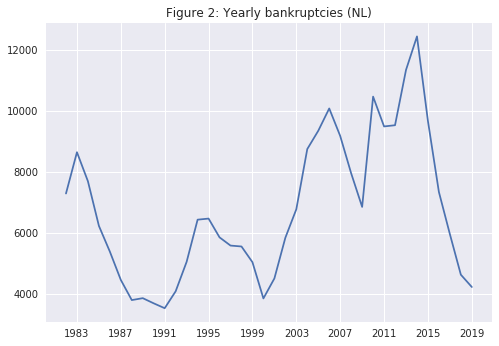

In [11]:
plt.plot(Yearly)
plt.title("Figure 2: Yearly bankruptcies (NL)")
plt.show()

<div style="text-align: justify"> Figure 2 provides the annual amount of bankruptcies in The Netherlands. However, we only show this plot to get an idea of how the data looks like. For our analysis, we will still use the monthly observations in the series 'ts'. </div>

<a name="Stat"></a>
## Testing for Stationarity

<div style="text-align: justify"> We have generated a timeseries called 'ts'. Now, we perform grahical exploration of the series and then test if 'ts' is stationary using the Dickey-Fuller test. As mentioned in the methodology, with stationarity, we refer to statistical properties (meand and variance) being constant over time. This ensures that the future is like the past, and that historical data can be used for forecasting properties.   </div>


In [12]:
#Taking a first look at our data by plotting the time series
import plotly.graph_objs as go
import plotly.plotly as py

column_names2 = ['Type gefailleerde','Date','bankruptcy']
fail2 = pd.read_csv("Fail.csv", parse_dates=['Date'], header=0, names = column_names)

data = [go.Scatter( x=fail2['Date'], y=fail2['bankruptcy'] )]
layout = go.Layout(
    title='Figure 3: Total monthly bankruptcies (NL)',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Amount',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig2 = dict(data=data, layout=layout)
py.iplot(fig2, filename='Pandas-Time series')

<div style="text-align: justify"> In figure 3, we plotted our time series of bankruptcies in the Netherlands. We observe a lot of variation in the data, which could be an indicator of a changing mean over time. Therefore, this graph raises suspension of our series being non-stationary. We will proceed with testing for stationarity by using a Dickey-Fuller Test. </div>

In [35]:
from statsmodels.tsa.stattools import adfuller #importing the DF test
def test_stationarity(timeseries):
    
    #determining rolling statistics
    rolmean = ts.rolling(12).mean() #One can play with the window, here set it to 12 months, but we could e.g. set it to 36
    rolstd = ts.rolling(12).std() # Same applies here regarding the window, if one increases the window, the statistic will become more smoothened
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'yellow', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Figure 4: Rolling Mean & Standard Deviation')
    plt.show(block=False)
   
    #perform Dickey-Fuller Test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

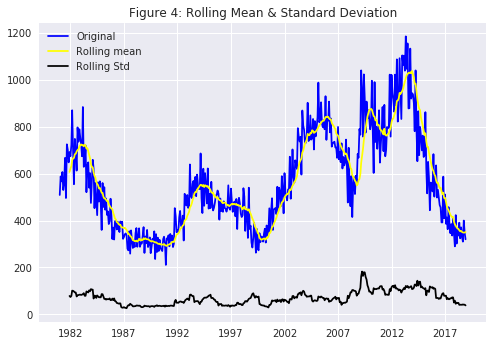

Results of Dickey-Fuller Test:
Test Statistic                  -2.283408
p-value                          0.177375
#Lags Used                      14.000000
Number of observations Used    441.000000
Critical Value (5%)             -2.868116
Critical Value (1%)             -3.445266
Critical Value (10%)            -2.570273
dtype: float64


In [36]:
test_stationarity(ts)

**Moving average / Moving Standard Deviation** 
<div style="text-align: justify"> In figure 4, we've plotted the rolling statistics. This basically means that we created a series of averages and standard deviations of different subsets in the data, here for a period of 12 months. We do this in order to smoothen the series. </div>

**Dickey-Fuller test** 
<div style="text-align: justify"> The null-hypothesis of the Dickey-Fuller tests states that the series is non-stationary, meaning that if we can reject the null-hypothesis with statistical significance, our timeseries is stationary. From our results, we observe p-value equal to 0.177, meaning we are unable to significantlty reject the null-hypothesis, and that ' ts' is, as we expected, *non-stationary*. Therefore, we will proceed with two possible transformations: </div>

> 1) Moving Average <br>
2) First differencing

<a name="MA"></a>
## Making the Series Stationary by Moving Average


<div style="text-align: justify"> Now that we have concluded that our timeseries is non-stationary, we need to transform our data into a stationary timeseries. Initally, it means we need to apply a method in order to correct for trends and seasonality. This can be done in more than one way. In this section we will make our series stationary by using the moving average. </div>

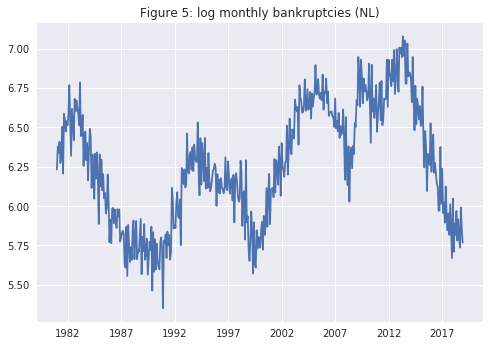

In [15]:
#transform the series into a logarithm
ts_log = np.log(ts)
plt.plot(ts_log)
plt.title('Figure 5: log monthly bankruptcies (NL)')
plt.show()

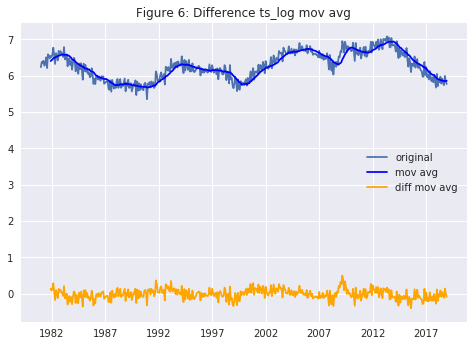

In [16]:
#Moving average
moving_avg = ts_log.rolling(12).mean()

#substract the rolling mean from the original series
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)
log_orig = plt.plot(ts_log, label = 'original')
movavg = plt.plot(moving_avg, color = 'blue', label ='mov avg')
diffmovavg = plt.plot(ts_log_moving_avg_diff, color = 'orange', label = 'diff mov avg')
plt.legend(loc='best')
plt.title('Figure 6: Difference ts_log mov avg')
plt.show()

As we can see in figure 6, when transforming the series into a logarithm, and by calculating the difference between the original series and the moving average, the series look a lot more 'constant' over time. Let's see what happens if we run a Dickey-Fuller tests for stationarity of 'ts_log_moving_average_difference':

In [17]:
#redefining test_stationarity for ts_log_moving_avg_diff
def test_stationarity(timeseries):
    #determining rolling statistcs
    rolmean = ts_log_moving_avg_diff.rolling(12).mean()
    rolstd = ts_log_moving_avg_diff.rolling(12).std()
    
    #plot rolling statistics
    orig = plt.plot(ts_log_moving_avg_diff, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'yellow', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'red', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Figure 7: Rolling Mean & Standard Deviation ts_log moving average difference')
    plt.show(block=False)
   
    #perform Dickey-Fuller Test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts_log_moving_avg_diff, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

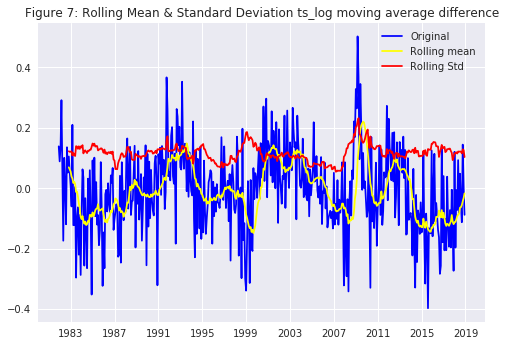

Results of Dickey-Fuller Test:
Test Statistic                  -3.878688
p-value                          0.002197
#Lags Used                      14.000000
Number of observations Used    430.000000
Critical Value (5%)             -2.868285
Critical Value (1%)             -3.445649
Critical Value (10%)            -2.570363
dtype: float64


In [18]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

<div style="text-align: justify"> After subtracting the moving average from the log of the original series, we observe that the large spikes are excluded. With the results of the Dickey-Fuller test, we can conclude that the timeseries 'ts_log_moving_avg_diff' is now stationary. We can reject the null-hypothesis of non-stationarity on a 99% confidence interval (p-value = 0.002). </div>


<a name="FD"></a>
## Making the Series Stationary by First Differencing

Since the previous method has some drawback, we decided to also use first differencing to make our timeseries stationary. In order to do so, we substract our timeseries with the first difference of our timeseries. The transformation basically entails:

$$\Delta y_{{t}}=y_{{t}}-y_{{t-1}} $$



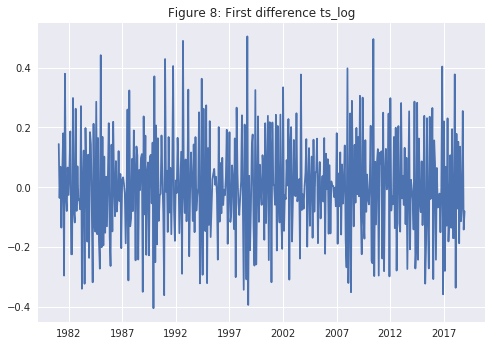

In [19]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.title('Figure 8: First difference ts_log')
plt.show()

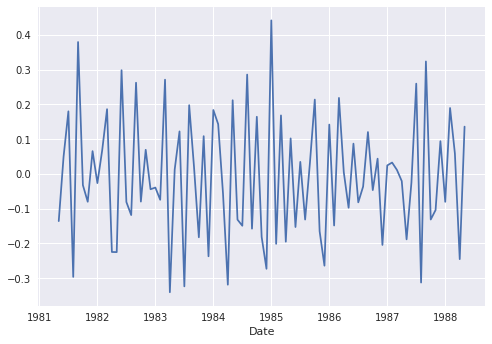

In [20]:
ts_log_diff['1981-05-01' : '1988-05-01 '].plot() #just some partial plotting example
plt.show()
plt.clf()

In [21]:
#redefining test_stationarity for ts_log_diff
def test_stationarity(timeseries):
    #determining rolling statistcs
    rolmean = ts_log_diff.rolling(12).mean() 
    rolstd = ts_log_diff.rolling(12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'yellow', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Figure 9: Rolling Mean & Standard Deviation ts_log_diff')
    plt.show(block=False)
   
    #perform Dickey-Fuller Test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts_log_diff, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

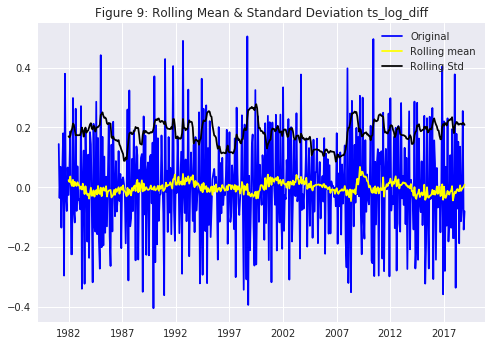

Results of Dickey-Fuller Test:
Test Statistic                  -4.255528
p-value                          0.000530
#Lags Used                      18.000000
Number of observations Used    436.000000
Critical Value (5%)             -2.868192
Critical Value (1%)             -3.445438
Critical Value (10%)            -2.570313
dtype: float64


In [22]:
#Testing for stationarity residual
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

<div style="text-align: justify"> After first differencing our series, we observe a p-value of 0.0005 of the DF-test, implicating that we can reject the null-hypothesis of non-stationarity, and conclude that the series is stationary on a 99.9% interval. We will continue our analysis by using the first difference of 'ts_log'. </div>

**Decomposing** <br>
<div style="text-align: justify"> When using the first difference approach, we account for trends and for seasonality. Our final step is to check for stationarity in the residuals. We first show the code to decompose the trend and seasonality of the original series 'ts_log'. Then, we remove both components from the time series and test if the residuals are stationary as well. </div>

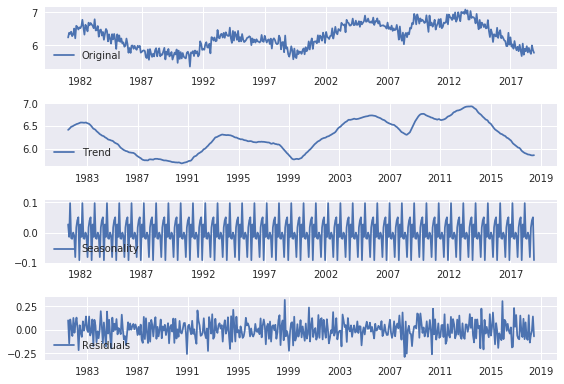

In [23]:
#See what our data looks like when we decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

#defining trend, seasonality and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#plotting trend, seasonality and residuals
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [24]:
#Check stationarity of residuals 
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

#redefining test_stationarity again for ts_log_decompose
def test_stationarity(timeseries):
    #determining rolling statistcs
    rolmean = ts_log_decompose.rolling(12).mean() 
    rolstd = ts_log_decompose.rolling(12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'yellow', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Figure 10: Rolling Mean & Standard Deviation residuals')
    plt.show(block=False)
   
    #perform Dickey-Fuller Test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts_log_decompose, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

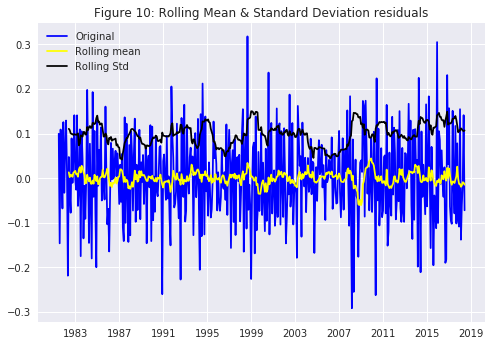

Results of Dickey-Fuller Test:
Test Statistic                -6.952161e+00
p-value                        9.630710e-10
#Lags Used                     1.800000e+01
Number of observations Used    4.250000e+02
Critical Value (5%)           -2.868365e+00
Critical Value (1%)           -3.445831e+00
Critical Value (10%)          -2.570405e+00
dtype: float64


In [25]:
test_stationarity(ts_log_decompose)

<div style="text-align: justify"> Once again, we can significantly reject the null-hypothesis of the DF test, indicating that our residuals are stationary. This also means that we do not need to include a moving average part in our modelling below. We will proceed with forecasting in the section 'Making an ARIMA model'. </div>

<a name="ARIMA"></a>
## Making an ARIMA model

<div style="text-align: justify"> In this section we will starting building the Auto Regressive Integrated Moving Average (ARIMA). ARIMA is a statistical modelling method to forecast data. It is like a lineair regression equation where the predictors depend on parameters of the ARIMA. In order to determine these parameters, we must first compute the Autocorrelation function and the Partial autocorrelation function. Since people are used to read an ACF or PACF in many different ways, we decided to compute them in two different ways. You can use either one of them to determine the parameters of the ARIMA. </div>

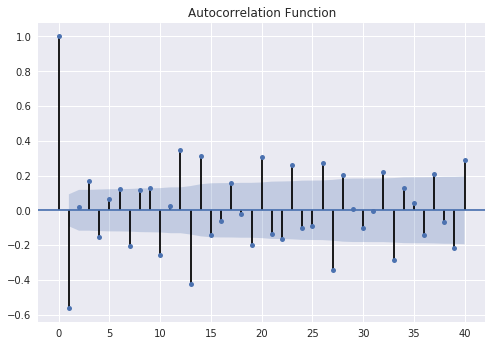

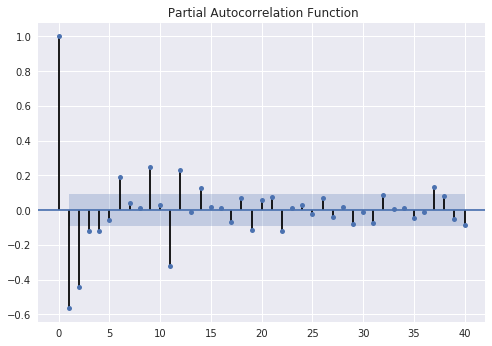

In [26]:
#First way of plotting the ACF and PACF of ts_log_diff

#plot for ACF
plot_acf(ts_log_diff, lags=40)
plt.title('Autocorrelation Function')
plt.show()

#plot for PACF
plot_pacf(ts_log_diff, lags=40)
plt.title(' Partial Autocorrelation Function')
plt.show()

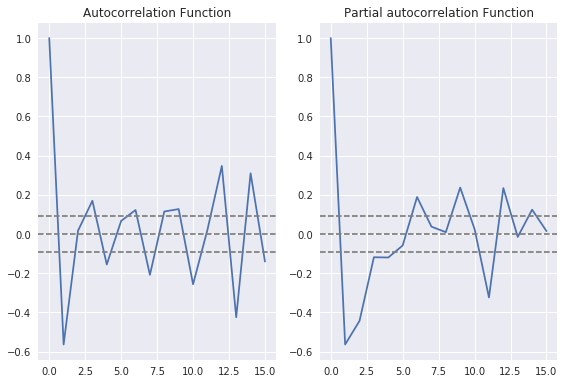

In [27]:
#second way of plotting ACF and PACF
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags = 15)
lag_pacf = pacf(ts_log_diff, nlags=15, method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.title('Partial autocorrelation Function')
plt.tight_layout()
plt.show()

<div style="text-align: justify"> Now, we start modeling the ARIMA. We use the PACF to determine the number of auto-regressive terms, and the ACF to determine the number of moving average terms. If we look at the first way of reporting our PACF grapg, we see a spike at lag 14, after which the PACF dies out. We decided to take 14 auto-regressive terms, and 2 moving average terms into consideration. One can play around with these numbers, what you are looking for is a combination of parameters giving you the lowest RSS. 
<br>
<br>
**AIC and BIC lag selection** <br>
Theoretically, it is not a decent approach to only consider the ACF and PACF (and OLS regression results) for lag selection. Instead, one should additionally use AIC or BIC criteria. However, we've tried to find a package or a code to use AIC or BIC lag selection, but there does not seem to be anything available to run in Python. Therefore, we will simply follow the results from the ACF and the PACF for estimating our models.</div>

Plotting AR model


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



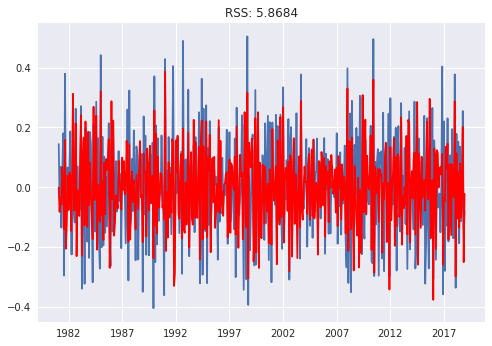

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             bankruptcy   No. Observations:                  455
Model:                    ARMA(14, 1)   Log Likelihood                 344.127
Method:                       css-mle   S.D. of innovations              0.113
Date:                Thu, 31 Jan 2019   AIC                           -654.255
Time:                        15:57:45   BIC                           -584.210
Sample:                    02-01-1981   HQIC                          -626.660
                         - 12-01-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0007      0.003     -0.215      0.830      -0.008       0.006
ar.L1.bankruptcy     -0.6785      0.353     -1.924      0.055      -1.369       0.013
ar.L2.bankruptcy     -0.3878      0.288     -1.348      0.178      -0.952       0.176
ar.L3.bankruptcy     -0.1355      0.170     -0.799      0.425      -0.468       0.197
ar.L4.bankruptcy     -0.0157      0.092     -0.171      0.864      -0.196       0.164
ar.L5.bankruptcy      0.1889      0.061      3.095      0.002       0.069       0.308
ar.L6.bankruptcy      0.2069      0.089      2.336      0.020       0.033       0.381
ar.L7.bankruptcy      0.0704      0.105      0.673      0.501      -0.135       0.275
ar.L8.bankruptcy      0.1134      0.070      1.616      0.107      -0.024       0.251
ar.L9.bankruptcy      0.0672      0.079      0.848      0.397      -0.088       0.223
ar.L10.bankruptcy    -0.1467      0.069     -2.113      0.035      -0.283      -0.011
ar.L11.bankruptcy    -0.0825      0.075     -1.096      0.274      -0.230       0.065
ar.L12.bankruptcy     0.2938      0.071      4.137      0.000       0.155       0.433
ar.L13.bankruptcy     0.0560      0.100      0.562      0.575      -0.139       0.251
ar.L14.bankruptcy     0.1254      0.047      2.666      0.008       0.033       0.218
ma.L1.bankruptcy     -0.1243      0.355     -0.350      0.727      -0.821       0.572
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0506           -0.0000j            1.0506           -0.5000
AR.2            -0.9356           -0.4876j            1.0550           -0.4235
AR.3            -0.9356           +0.4876j            1.0550            0.4235
AR.4            -0.6044           -0.8396j            1.0345           -0.3493
AR.5            -0.6044           +0.8396j            1.0345            0.3493
AR.6             1.1123           -0.0000j            1.1123           -0.0000
AR.7             1.0546           -0.5690j            1.1983           -0.0787
AR.8             1.0546           +0.5690j            1.1983            0.0787
AR.9             0.5373           -0.9402j            1.0829           -0.1674
AR.10            0.5373           +0.9402j            1.0829            0.1674
AR.11            0.0071           -1.0749j            1.0749           -0.2490
AR.12            0.0071           +1.0749j            1.0749            0.2490
AR.13           -0.3131           -1.6876j            1.7164           -0.2792
AR.14           -0.3131           +1.6876j            1.7164            0.2792
MA.1             8.0475           +0.0000j            8.0475            0.0000
------------------------------------------------------------------------------
"""

In [28]:
#Here we model the AR model
print('Plotting AR model')
mod1 = ARMA(ts_log_diff, order=(14,1,0))
results_AR = mod1.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.show()
results_AR.summary()

Plotting MA model


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



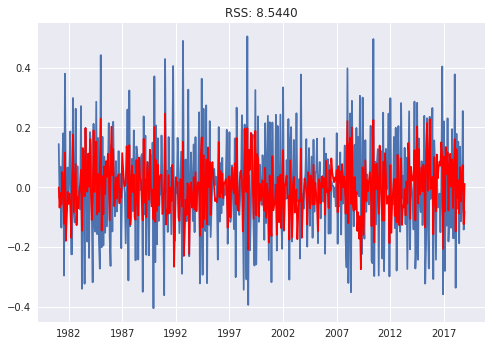

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             bankruptcy   No. Observations:                  455
Model:                     ARMA(0, 1)   Log Likelihood                 258.606
Method:                       css-mle   S.D. of innovations              0.137
Date:                Thu, 31 Jan 2019   AIC                           -511.212
Time:                        15:58:33   BIC                           -498.851
Sample:                    02-01-1981   HQIC                          -506.343
                         - 12-01-2018                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0011      0.002     -0.530      0.597      -0.005       0.003
ma.L1.bankruptcy    -0.6793      0.026    -26.351      0.000      -0.730      -0.629
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4721           +0.0000j            1.4721            0.0000
-----------------------------------------------------------------------------
"""

In [29]:
#Here we model the MA model
print('Plotting MA model')
mod2 = ARMA(ts_log_diff, order=(0,1,2))
results_MA = mod2.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plt.show()
results_MA.summary()

Plotting ARIMA model


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



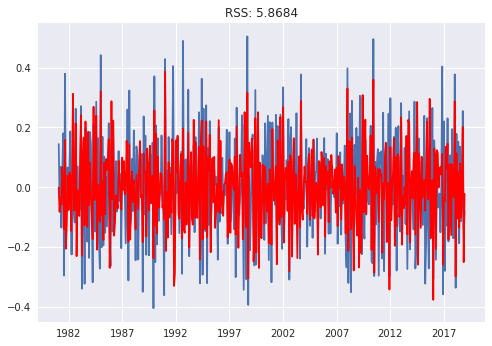

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             bankruptcy   No. Observations:                  455
Model:                    ARMA(14, 1)   Log Likelihood                 344.127
Method:                       css-mle   S.D. of innovations              0.113
Date:                Thu, 31 Jan 2019   AIC                           -654.255
Time:                        16:05:18   BIC                           -584.210
Sample:                    02-01-1981   HQIC                          -626.660
                         - 12-01-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0007      0.003     -0.215      0.830      -0.008       0.006
ar.L1.bankruptcy     -0.6785      0.353     -1.924      0.055      -1.369       0.013
ar.L2.bankruptcy     -0.3878      0.288     -1.348      0.178      -0.952       0.176
ar.L3.bankruptcy     -0.1355      0.170     -0.799      0.425      -0.468       0.197
ar.L4.bankruptcy     -0.0157      0.092     -0.171      0.864      -0.196       0.164
ar.L5.bankruptcy      0.1889      0.061      3.095      0.002       0.069       0.308
ar.L6.bankruptcy      0.2069      0.089      2.336      0.020       0.033       0.381
ar.L7.bankruptcy      0.0704      0.105      0.673      0.501      -0.135       0.275
ar.L8.bankruptcy      0.1134      0.070      1.616      0.107      -0.024       0.251
ar.L9.bankruptcy      0.0672      0.079      0.848      0.397      -0.088       0.223
ar.L10.bankruptcy    -0.1467      0.069     -2.113      0.035      -0.283      -0.011
ar.L11.bankruptcy    -0.0825      0.075     -1.096      0.274      -0.230       0.065
ar.L12.bankruptcy     0.2938      0.071      4.137      0.000       0.155       0.433
ar.L13.bankruptcy     0.0560      0.100      0.562      0.575      -0.139       0.251
ar.L14.bankruptcy     0.1254      0.047      2.666      0.008       0.033       0.218
ma.L1.bankruptcy     -0.1243      0.355     -0.350      0.727      -0.821       0.572
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0506           -0.0000j            1.0506           -0.5000
AR.2            -0.9356           -0.4876j            1.0550           -0.4235
AR.3            -0.9356           +0.4876j            1.0550            0.4235
AR.4            -0.6044           -0.8396j            1.0345           -0.3493
AR.5            -0.6044           +0.8396j            1.0345            0.3493
AR.6             1.1123           -0.0000j            1.1123           -0.0000
AR.7             1.0546           -0.5690j            1.1983           -0.0787
AR.8             1.0546           +0.5690j            1.1983            0.0787
AR.9             0.5373           -0.9402j            1.0829           -0.1674
AR.10            0.5373           +0.9402j            1.0829            0.1674
AR.11            0.0071           -1.0749j            1.0749           -0.2490
AR.12            0.0071           +1.0749j            1.0749            0.2490
AR.13           -0.3131           -1.6876j            1.7164           -0.2792
AR.14           -0.3131           +1.6876j            1.7164            0.2792
MA.1             8.0475           +0.0000j            8.0475            0.0000
------------------------------------------------------------------------------
"""

In [30]:
#Here we model the ARIMA model
print('Plotting ARIMA model')
mod3 = ARMA(ts_log_diff, order=(14,1,2))
results_ARIMA = mod3.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()
results_ARIMA.summary()

<a name="Forecast"></a>
## Forecasting the Timeseries

**Results modelling**

From the three models above, we conclude that the AR and ARIMA model have the lowest RSS: 5.8684, which is still considerably high. The p-values of the ARIMA model for the lags 5, 6, 10, 12 and 14 indicate statistical significance at 95% confidence intervals (or even higher intervals). We will proceed by using the ARIMA model to forecast the data, eventhough the RSS is high. The last steps we need to take are:

> 1. Get the predicted values and store it as time series 
2. Find the cumulative sum and add it to a new series, where the base value is the first-month value of the series
3. Take the exponent of the new series as predicted values
4. Plot the predicted values alongside the original series



In [31]:
#Take the predicted values and store as time series
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1981-02-01   -0.000747
1981-03-01   -0.082841
1981-04-01   -0.035309
1981-05-01   -0.058283
1981-06-01    0.067010
dtype: float64


In [32]:
#finding the cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1981-02-01   -0.000747
1981-03-01   -0.083587
1981-04-01   -0.118896
1981-05-01   -0.177179
1981-06-01   -0.110170
dtype: float64


In [33]:
#coverting to a log scale, and adding the cumulative sum to the new series with a base value
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



Date
1981-01-01    6.232448
1981-02-01    6.231701
1981-03-01    6.148861
1981-04-01    6.113552
1981-05-01    6.055269
dtype: float64

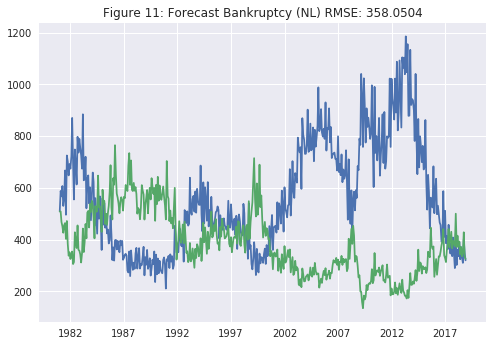

In [34]:
#Plotting the predicted values, and finding Root Mean Square Error (RSME)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('Figure 11: Forecast Bankruptcy (NL) RMSE: %.4f'%np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.show()

<a name="Concluding"></a>
## Concluding Remarks

<div style="text-align: justify"> After forecasting our data using the ARIMA model, we find some remarkable results. Figure 11 shows the plot with the original series (blue line) and the predicted values (green line). Our predicted values seems to behave exactly the opposite way as the original series, which can explain the very high RMSE statistic. We've conducted several lines of codes to fix this and to rerun our models, but we were not able to solve this problem. The current model is the one that gave us the lowest RMSE of all attempts. 
<br>
<br>
However, if we look at the regression results of the ARIMA model, we find that most of the lagged variables are statistically significant. This leaves us by coming up with some possible explanations for the contrast between the predicted and original series. We properly conducted stationarity tetst and transformed our data. So, there should not be an estimation bias due to serial correlation. Therefore, we deem the following two scenario's to cause errors in our forecast:
<br>
<br>
**1. Breaks** <br>
It is very likely that there are breaks in our series: If we ignore the potential existence of breaks, as we did, one would observe poor forecasts. The solution would be to estimate the breaks sequentially and use a threshold model, or, maybe even a smooth transition model. As we already mentioned in the introduction, there is evidence in the literature claming that bankruptcies are high under poor macroeconomic performance or instability, vice versa. Therefore, one could use the lagged GDP growth as a threshold variable (i.e. indicator of the business cycle) for better forecasting. 
<br>
<br>
**2. Nature of bankruptcies** <br>
Maybe, it is very hard to predict the monthly total number of bankruptcy filings. Instead, one could try to model the variance rather than the actual values. This makes it possible to generate accurate forecast intervals. We would recommend to use a GARCH model for this purpose in which the mean already has been modelled.
<br> 
<br> 
To conclude, we tried to provide a decent forecast of the monthly bankrucpties in The Netherlands. Unfortunately, our forecast does not seem to be a good fit according to past values, which could be due to omitting breaks in the model, or, due to the nature of uncertainty according to bankruptcies. </div>

## References

Bhattacharjee, A., Higson, C., Holly, S., & Kattuman, P. (2009). Macroeconomic instability and business exit: Determinants of failures and acquisitions of UK firms. Economica, 76(301), 108-131.

Hudson, J. (1986). Company liquidations in England and Wales. Applied Economics, 18(2), 219-235.


Liu, J. (2004). Macroeconomic determinants of corporate failures: evidence from the UK. Applied Economics, 36(9), 939-945.


Robson, M. T. (1996). MACROECONOMIC FACTORS IN THE BIRTH AND DEATH OF UK. FIRMS: EVIDENCE FROM QUARTERLY VAT REGISTRATIONS. The Manchester School, 64(2), 170-188.


Shumway, T. (2001). Forecasting bankruptcy more accurately: A simple hazard model. The journal of business, 74(1), 101-124.